# Töö uue andmestikuga

**NB! andmestiku peab manuaalselt alla tõmbamba kuna githubi limiit on 100 MB**
https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018/data?select=2013.csv - 2013.csv

In [23]:
import pandas as pd
import numpy as np

#df=pd.read_csv('2013.csv')

print(np.unique(df['CANCELLED']))
print(np.unique(df['DIVERTED']))
#print(df.loc[100])
print(np.shape(df))


[0. 1.]
[0. 1.]
(6369482, 28)


In [20]:
# Explore data :DDDDDDDDD
mean_arr_delay = df['ARR_DELAY'].mean()
print(mean_arr_delay)

average_planned_flight_time = df['CRS_ELAPSED_TIME'].mean()
print(average_planned_flight_time)

average_flight_time = df['ACTUAL_ELAPSED_TIME'].mean()
print(average_flight_time)

average_distance = df['DISTANCE'].mean()
print(average_distance)
df['ARR_DELAY'].describe()

6.010871805358738
132.7304028258521
129.32025782394544
762.0778857684188


count    6.259310e+06
mean     6.010872e+00
std      3.805200e+01
min     -1.530000e+02
25%     -1.200000e+01
50%     -3.000000e+00
75%      1.000000e+01
max      1.983000e+03
Name: ARR_DELAY, dtype: float64

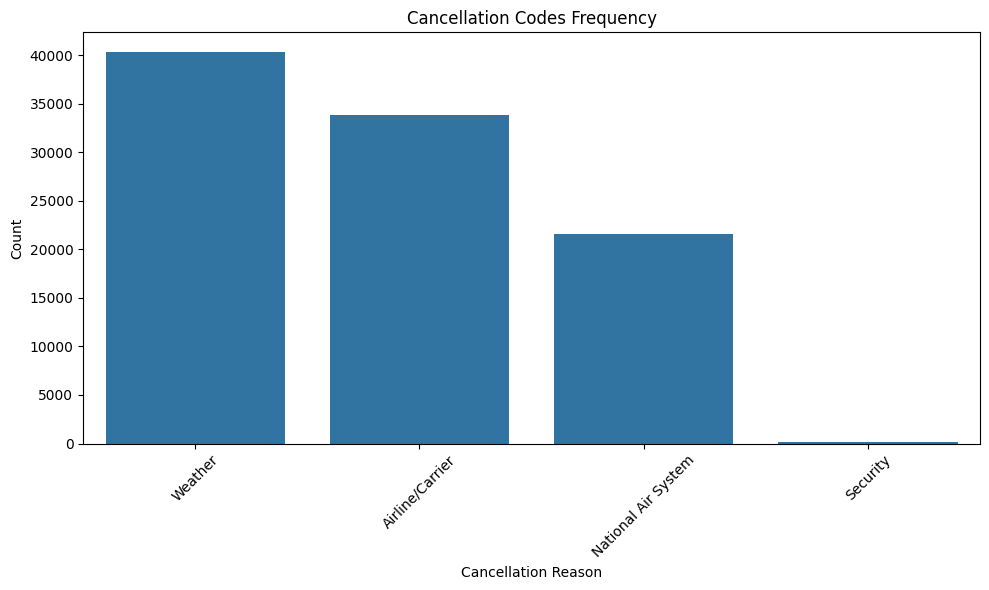

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping dictionary for cancellation codes
cancellation_map = {
    'A': 'Airline/Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

# Count the occurrences of each cancellation code
cancellation_counts = df['CANCELLATION_CODE'].value_counts()

# Create a bar plot with mapped labels
plt.figure(figsize=(10, 6))
sns.barplot(
    x=cancellation_counts.index.map(cancellation_map), 
    y=cancellation_counts.values
)
plt.title('Cancellation Codes Frequency')
plt.xlabel('Cancellation Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

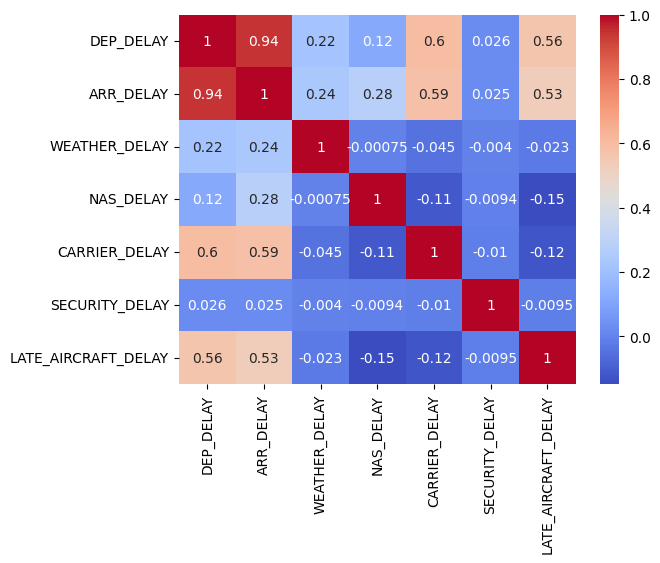

In [24]:
# Correlation between different types of delays
delay_columns = ['DEP_DELAY', 'ARR_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'CARRIER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
delay_correlation = df[delay_columns].corr()
sns.heatmap(delay_correlation, annot=True, cmap='coolwarm')

Text(0, 0.5, 'Average Arrival Delay')

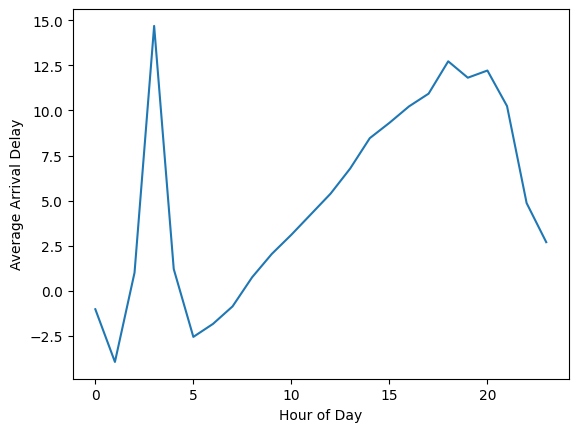

In [26]:
# Convert CRS_DEP_TIME to hour of day
df['DEP_HOUR'] = df['CRS_DEP_TIME'] // 100
delay_by_hour = df.groupby('DEP_HOUR')['ARR_DELAY'].mean()
delay_by_hour.plot(kind='line')
plt.xlabel('Hour of Day')
plt.ylabel('Average Arrival Delay')

<Axes: >

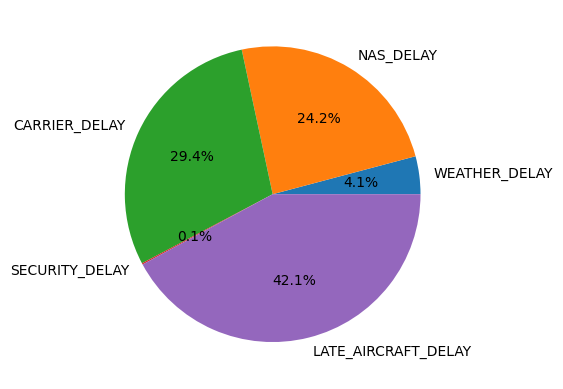

In [27]:
# Breakdown of delay types
delay_types = ['WEATHER_DELAY', 'NAS_DELAY', 'CARRIER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
df[delay_types].sum().plot(kind='pie', autopct='%1.1f%%')

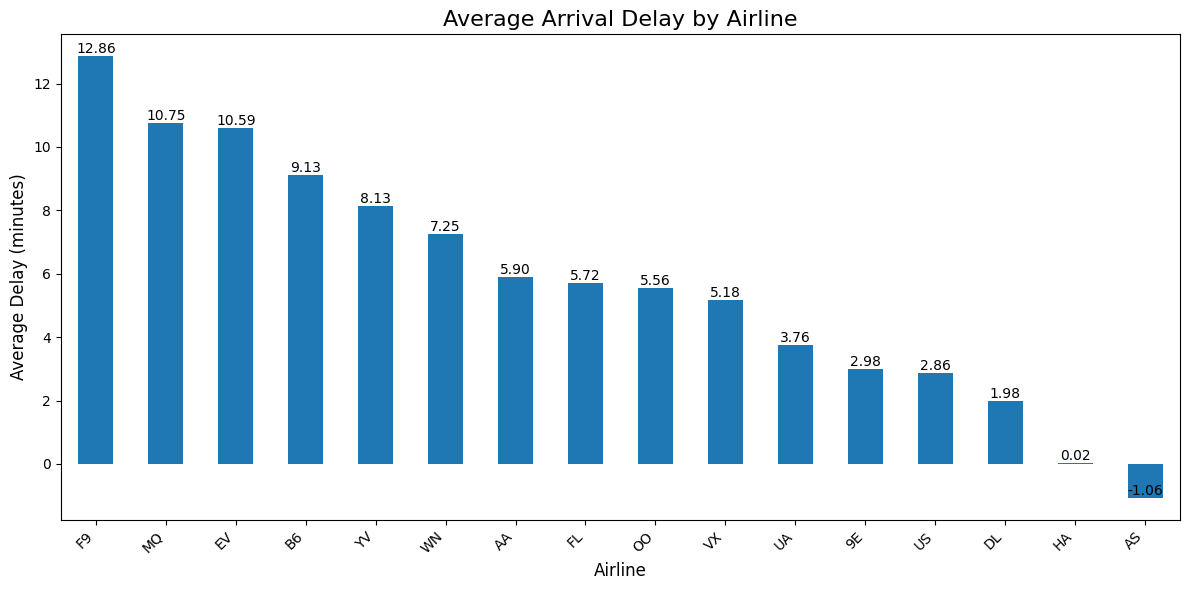

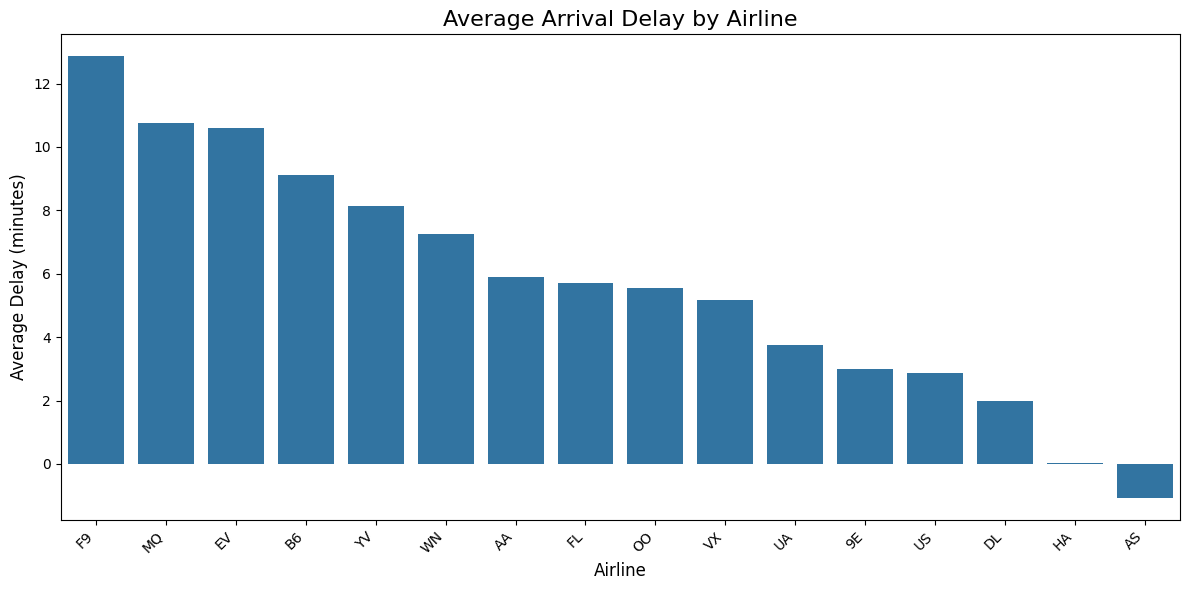

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average arrival delay by carrier
carrier_delays = df.groupby('OP_CARRIER')['ARR_DELAY'].mean().sort_values(ascending=False)

# Create the plot with improved styling
plt.figure(figsize=(12, 6))
carrier_delays.plot(kind='bar')
plt.title('Average Arrival Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Optional: Add value labels on top of each bar
for i, v in enumerate(carrier_delays):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Alternative with Seaborn for more styling options
plt.figure(figsize=(12, 6))
sns.barplot(x=carrier_delays.index, y=carrier_delays.values)
plt.title('Average Arrival Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# Method 1: Using .loc[] with boolean indexing
first_row = df.loc[(df['ARR_DELAY'] > 80) & (df['ARR_DELAY'] < 100)].iloc[0]
print("Method 1 - First Row:")
print(first_row)

Method 1 - First Row:
FL_DATE                2013-01-01
OP_CARRIER                     WN
OP_CARRIER_FL_NUM            1162
ORIGIN                        MDW
DEST                          CHS
CRS_DEP_TIME                 2055
DEP_TIME                   2233.0
DEP_DELAY                    98.0
TAXI_OUT                      8.0
WHEELS_OFF                 2241.0
WHEELS_ON                   114.0
TAXI_IN                       4.0
CRS_ARR_TIME                 2355
ARR_TIME                    118.0
ARR_DELAY                    83.0
CANCELLED                     0.0
CANCELLATION_CODE             NaN
DIVERTED                      0.0
CRS_ELAPSED_TIME            120.0
ACTUAL_ELAPSED_TIME         105.0
AIR_TIME                     93.0
DISTANCE                    745.0
CARRIER_DELAY                63.0
WEATHER_DELAY                 0.0
NAS_DELAY                     0.0
SECURITY_DELAY                0.0
LATE_AIRCRAFT_DELAY          20.0
Unnamed: 27                   NaN
DEP_HOUR                  

In [29]:
df.isnull().sum() # Only DelayReason has missing values

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 91681
DEP_DELAY                91681
TAXI_OUT                 94903
WHEELS_OFF               94903
WHEELS_ON                98275
TAXI_IN                  98275
CRS_ARR_TIME                 0
ARR_TIME                 98275
ARR_DELAY               110172
CANCELLED                    0
CANCELLATION_CODE      6273470
DIVERTED                     0
CRS_ELAPSED_TIME             5
ACTUAL_ELAPSED_TIME     110172
AIR_TIME                110172
DISTANCE                     0
CARRIER_DELAY          5100205
WEATHER_DELAY          5100205
NAS_DELAY              5100205
SECURITY_DELAY         5100205
LATE_AIRCRAFT_DELAY    5100205
Unnamed: 27            6369482
DEP_HOUR                     0
dtype: int64

Let's start with feature engineering and determine how long each flight lasted. However, we need to also make sure that the timezones are correct, so let's check for which airports' data our dataset uses.


In [ ]:
print(df['Origin'].unique())
# ORD = O'Hare, Chigago, LAX = Los Angeles, DFW = Dallas Fort Worth, JFK = Kennedy New York, ATL = Atlanta
print(df['Destination'].unique())
# MIA = Miami, SFO = San Francisco, BOS = Boston, SEA = Seattle, washington, 'JFK'
# UTC(-8) = SFO, LAX, SEA
# UTC(-6) = DFW, ORD
# UTC(-5) = ATL, JFK, MIA, BOS

['ORD' 'LAX' 'DFW' 'JFK' 'ATL']
['MIA' 'SFO' 'BOS' 'SEA' 'JFK']


In [ ]:


df_jfk_to_bos = df[(df['Origin'] == 'JFK') & (df['Destination'] == 'BOS')].copy()
df_jfk_to_bos['FlightTime'] = pd.to_datetime(df_jfk_to_bos['ActualArrival']) - pd.to_datetime(df_jfk_to_bos['ActualDeparture'])
average_flight_time_jfk_bos = df_jfk_to_bos['FlightTime'].mean()
print(average_flight_time_jfk_bos)

df_mia_to_lax = df[(df['Origin'] == 'LAX') & (df['Destination'] == 'MIA')].copy()
df_mia_to_lax['FlightTime'] = pd.to_datetime(df_mia_to_lax['ActualArrival']) - pd.to_datetime(df_mia_to_lax['ActualDeparture'])
average_flight_time = df_mia_to_lax['FlightTime'].mean()
print(average_flight_time)



0 days 03:24:51.721745585
0 days 03:25:06.647459851
0 days 03:25:14.105326408


In reality, a flight from Los Angeles to Miami should take about 4 hours and 45 minutes. In case our dataset does not consider timezone differences, flight time should be 7 hours and 45 minutes (as the timezone difference is 3 hours, thus the landing time is 3 hours larger than the actual flight time). In case of it considering timezone difference, flight time would be 3 hours less, thus about 4 hours and 45 minutes. 

By looking at the mean flight time of Miami to LA and seeing that it is about 3 hours and 25 minutes and also seeing that the flight time from NY to boston is about the same, we can conclude that this data is not realistic.

Similar logic applies between New York and Boston. Therefore, we can conclude that the dataset is synthetic.


In [38]:
df['FlightTime'] = pd.to_datetime(df['ActualArrival']) - pd.to_datetime(df['ActualDeparture'])

df.head()

,FlightID,Airline,FlightNumber,Origin,Destination,ScheduledDeparture,ActualDeparture,ScheduledArrival,ActualArrival,DelayMinutes,DelayReason,Cancelled,Diverted,AircraftType,TailNumber,Distance,FlightTime
0,1,United,4558,ORD,MIA,2024-09-01 08:11,2024-09-01 08:30,2024-09-01 12:11,2024-09-01 12:19,8,Weather,True,False,Boeing 737,N71066,1031,0 days 03:49:00
1,2,Delta,8021,LAX,MIA,2024-09-01 10:25,2024-09-01 10:41,2024-09-01 13:25,2024-09-01 13:27,2,Air Traffic Control,True,True,Airbus A320,N22657,1006,0 days 02:46:00
2,3,Southwest,7520,DFW,SFO,2024-09-01 16:53,2024-09-01 17:05,2024-09-01 17:53,2024-09-01 18:07,14,Weather,True,True,Boeing 737,N95611,2980,0 days 01:02:00
3,4,Delta,2046,ORD,BOS,2024-09-01 14:44,2024-09-01 15:04,2024-09-01 18:44,2024-09-01 18:34,-10,NaN,False,False,Boeing 777,N90029,1408,0 days 03:30:00
4,5,Delta,6049,LAX,SEA,2024-09-01 01:51,2024-09-01 02:08,2024-09-01 05:51,2024-09-01 06:15,24,Air Traffic Control,False,True,Boeing 737,N27417,2298,0 days 04:07:00


C:\Users\Kaarel\AppData\Local\Temp\ipykernel_27828\2785158603.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_reason_counts.index, y=delay_reason_counts.values, palette='viridis')


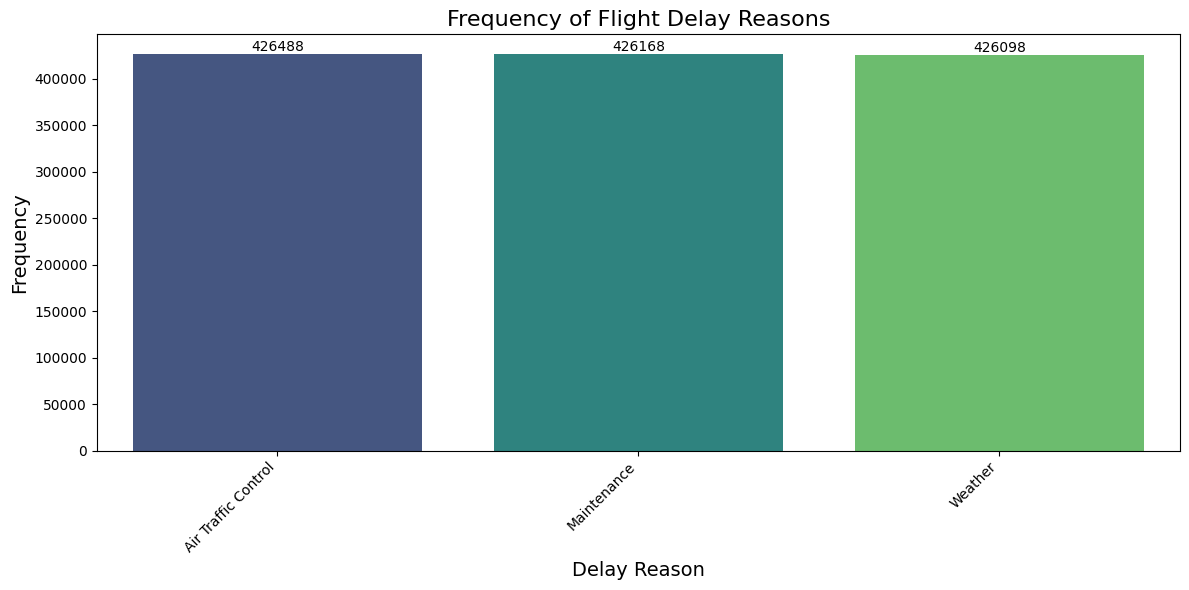

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each delay reason
delay_reason_counts = df['DelayReason'].value_counts()

# Plot the frequency as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=delay_reason_counts.index, y=delay_reason_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Delay Reason', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of Flight Delay Reasons', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate the bars with their frequency values
for index, value in enumerate(delay_reason_counts.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)  # Adjust offset for readability

plt.tight_layout()  # Adjust layout to prevent label cutoff

# Show the plot
plt.show()

The most common reason for the delay is air traffic control. However, the differences in frequencies are very small.

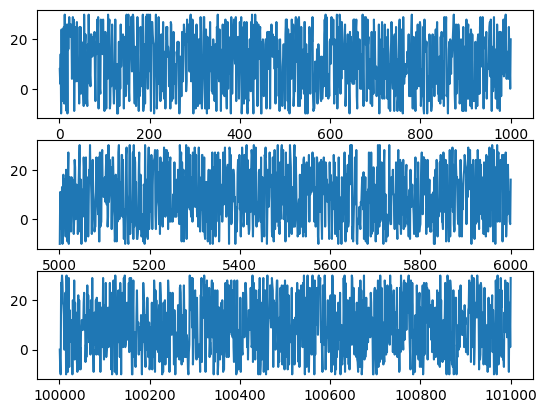

-10


In [ ]:
import numpy as np
fig,ax3 = plt.subplots(3)
ax3[0].plot('FlightID', 'DelayMinutes', data=df[0:1000])
ax3[1].plot('FlightID', 'DelayMinutes', data=df[5000:6000])
ax3[2].plot('FlightID', 'DelayMinutes', data=df[100000:101000])
plt.show()



In [62]:
print(np.min(df['DelayMinutes']))
print(np.max(df['DelayMinutes']))

-10
30


The biggest delay was 30 minutes while the smallest delay was -10 minutes which means that the flight took off 10 minutes before it was supposed to.

In [74]:
# First, ensure 'ActualArrival' is in datetime format
df['ActualArrival'] = pd.to_datetime(df['ActualArrival'])

# Then extract the day of the week as a string
df['Weekday'] = df['ActualArrival'].dt.day_name()

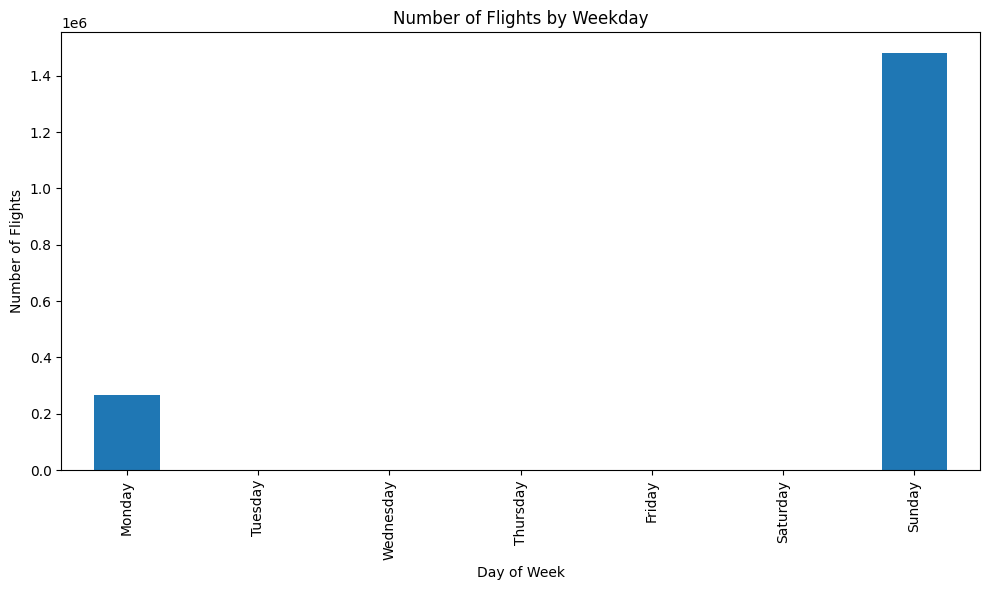

Weekday
Monday        267784.0
Tuesday            NaN
Wednesday          NaN
Thursday           NaN
Friday             NaN
Saturday           NaN
Sunday       1479843.0
Name: count, dtype: float64


In [77]:
# Method 1: Using value_counts()
weekday_flight_counts = df['ActualArrival'].dt.day_name().value_counts()

# Method 2: Using groupby()
weekday_flight_counts = df.groupby(df['ActualArrival'].dt.day_name()).size()

# Method 3: If you've already created a 'Weekday' column
weekday_flight_counts = df['Weekday'].value_counts()

# Sort in standard week order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_flight_counts = weekday_flight_counts.reindex(day_order)

# Visualize as a bar plot
plt.figure(figsize=(10, 6))
weekday_flight_counts.plot(kind='bar')
plt.title('Number of Flights by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

# Print the counts
print(weekday_flight_counts)

In [78]:
# Convert to datetime if not already
df['ActualDeparture'] = pd.to_datetime(df['ActualDeparture'])

# Extract weekday and time
df['DepartureWeekday'] = df['ActualDeparture'].dt.day_name()
df['DepartureTime'] = df['ActualDeparture'].dt.time

# Convert time to timedelta for easier comparison
df['DepartureTimedelta'] = pd.to_timedelta(df['DepartureTime'].astype(str))

# Find earliest and latest times for each weekday
earliest_times = df.groupby('DepartureWeekday')['DepartureTimedelta'].min()
latest_times = df.groupby('DepartureWeekday')['DepartureTimedelta'].max()

# Sort in standard week order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
earliest_times = earliest_times.reindex(day_order)
latest_times = latest_times.reindex(day_order)

# Print results
print("Earliest departure times by weekday:")
print(earliest_times)
print("\nLatest departure times by weekday:")
print(latest_times)

Earliest departure times by weekday:
DepartureWeekday
Monday      0 days
Tuesday        NaT
Wednesday      NaT
Thursday       NaT
Friday         NaT
Saturday       NaT
Sunday      0 days
Name: DepartureTimedelta, dtype: timedelta64[ns]

Latest departure times by weekday:
DepartureWeekday
Monday      0 days 00:29:00
Tuesday                 NaT
Wednesday               NaT
Thursday                NaT
Friday                  NaT
Saturday                NaT
Sunday      0 days 23:59:00
Name: DepartureTimedelta, dtype: timedelta64[ns]


Finding the earliest flight and latest flight

In [ ]:
# Ensure ActualDeparture is in datetime format

df['ActualDeparture'] = pd.to_datetime(df['ActualDeparture'])

# Find the earliest and latest departure dates
earliest_departure = df['ActualDeparture'].min()
latest_departure = df['ActualDeparture'].max()

# Print the results
print(f"Earliest Departure Date: {earliest_departure}")
print(f"Latest Departure Date: {latest_departure}")

Earliest Departure Date: 2024-09-01 00:00:00
Latest Departure Date: 2024-09-02 00:29:00


Uniform distribution of delay minutes

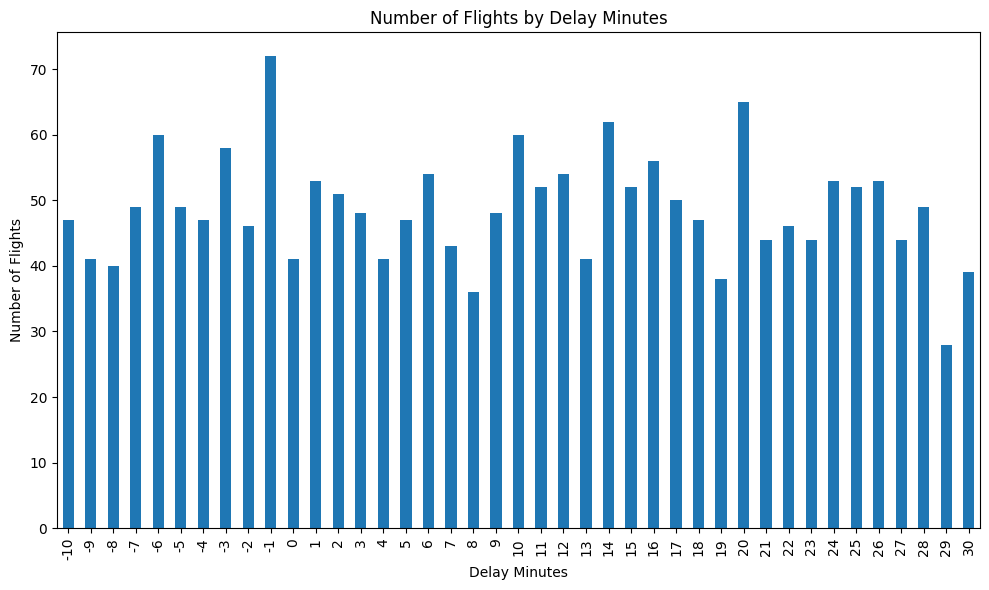

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each DelayMinutes value
delay_counts = df[5000:7000]['DelayMinutes'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
delay_counts.plot(kind='bar')
plt.title('Number of Flights by Delay Minutes')
plt.xlabel('Delay Minutes')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

In [87]:
mean_delays = df.groupby('Origin')['DelayMinutes'].mean()

print(mean_delays)

Origin
ATL    10.007840
DFW     9.982051
JFK    10.008262
LAX     9.994706
ORD    10.003008
Name: DelayMinutes, dtype: float64


In [89]:
mean_delays = df.groupby('Destination')['DelayMinutes'].mean()

print(mean_delays)

Destination
BOS     9.989404
JFK     9.978798
MIA    10.010067
SEA     9.998015
SFO    10.019601
Name: DelayMinutes, dtype: float64


In [93]:
mean_delays = df.groupby('DelayReason')['DelayMinutes'].mean()


print(mean_delays)

DelayReason
Air Traffic Control    15.500516
Maintenance            15.502213
Weather                15.492593
Name: DelayMinutes, dtype: float64


In [ ]:
from scipy.stats import kstest, uniform

# Scale the data to fit the uniform range 
scaled_data = (df['DelayMinutes'] - df['DelayMinutes'].min()) / (df['DelayMinutes'].max() - df['DelayMinutes'].min())
ks_stat, p_value = kstest(scaled_data, uniform.cdf)
print(f"KS Statistic: {ks_stat}, P-value: {p_value}")

KS Statistic: 0.024366183401835745, P-value: 0.0


This suggests that "DelayMinutes" has been generated from Uniform distribution.